<a href="https://colab.research.google.com/github/jessicamli/EE250_FinalProject_Talise_Jessica/blob/main/distances_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the dataset 'distances.csv' using pandas' read_csv function.
distances = pd.read_csv('distances.csv')
distances.tail(10)

,dist1,dist2,location
50,10,10,4
51,11,10,4
52,9,10,4
53,11,10,4
54,10,10,4
55,11,10,4
56,11,9,4
57,10,8,4
58,10,10,4
59,10,11,4


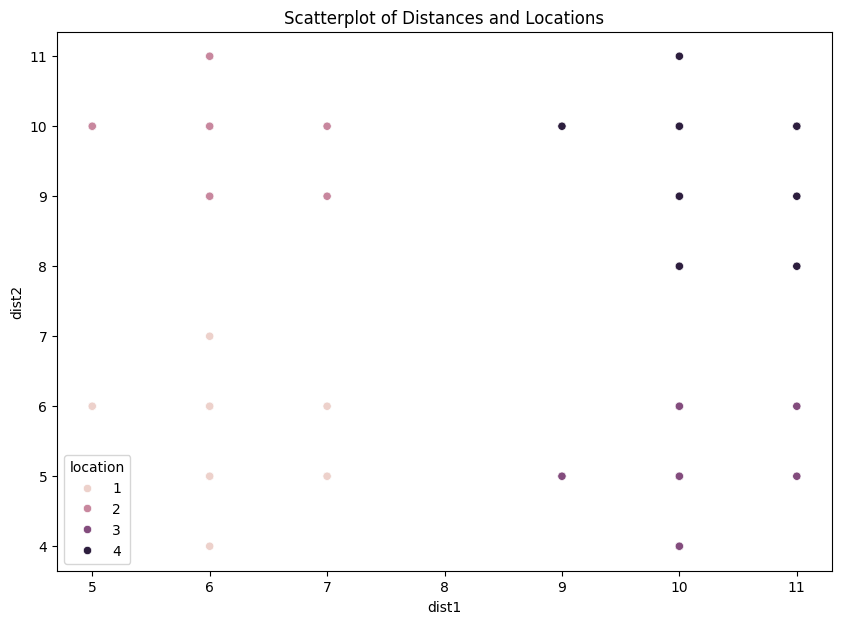

In [ ]:
# Visualize the data distribution using a scatterplot
sns.scatterplot(x="dist1", y="dist2", data=distances, hue="location")
plt.title("Scatterplot of Distances and Locations")
plt.show()

In [ ]:
# 1. Data Preparation:
# Prepare the input features (X)

distances["location"] = distances["location"] - distances["location"].min()
X = distances[["dist1", "dist2"]].to_numpy()
y = distances[["location"]].to_numpy()
y = to_categorical(y)   # COnverts to one-hot encoding

# Split the data into training and testing sets using train_test_split.
# Use an 80/20 split for training and testing and random_state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Set the arguments for train_test_split

# Normalize the input test and train features using StandardScaler to standardize reflectance and weight values.
scaler = StandardScaler()



In [ ]:
print(distances["location"].unique())
print(f"Number of unique classes: {len(distances['location'].unique())}")

# 2. Instantiate and Train the Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for 4 classes

# - Compile the model using Adam optimizer with a learning rate of 0.001,
# Changed from binary to categorical
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# - Train the model using X_train and y_train.
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Call the appropriate function to train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stopping], verbose=1)


[0 1 2 3]
Number of unique classes: 4
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.2295 - loss: 1.5794 - val_accuracy: 0.4000 - val_loss: 1.2295
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2685 - loss: 1.3185 - val_accuracy: 0.4000 - val_loss: 1.1292
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3772 - loss: 1.2216 - val_accuracy: 0.6000 - val_loss: 1.0673
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5836 - loss: 1.1637 - val_accuracy: 0.6000 - val_loss: 1.0036
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5719 - loss: 1.0946 - val_accuracy: 0.6000 - val_loss: 0.9404
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5914 - loss: 1.0018 - val_accuracy: 0.8000 - val_loss: 0.8724
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6966 - loss: 0.9303 - val_accuracy: 0.8000 - val_loss: 0.8140
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6966 - loss: 0.8532 - val_accuracy: 0.8000 - val_loss: 0.7532
Epo

**#experiement with the accuracy if used only 1 middle layer vs. 2 and so on**

In [ ]:
# - Call model.evaluate() on the test set (X_test, y_test) and print the test accuracy.
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy = %.2f' %(accuracy*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.2572
Accuracy = 100.00


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


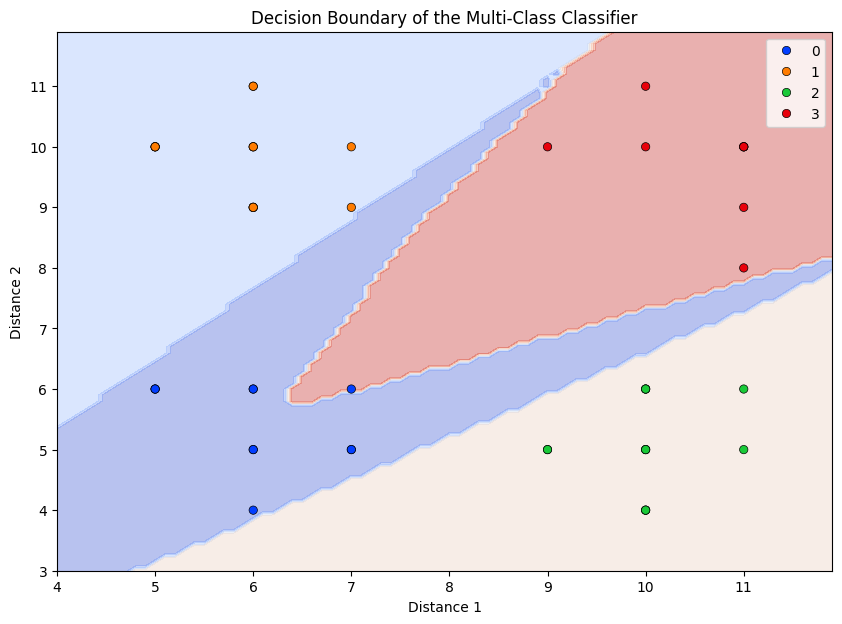

In [ ]:
# 4. Plot the Decision Boundary:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Convert probabilities into class predictions by getting index of max probability and reshaping to match the grid shape
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=np.argmax(y, axis=1), palette='bright', edgecolor="k")

    plt.xlabel('Distance 1')
    plt.ylabel('Distance 2')
    plt.title('Decision Boundary of the Multi-Class Classifier')
    plt.show()


# Call the function to plot the decision boundary by passing the correct arguments
plot_decision_boundary(X_train, y_train, model)




In [ ]:
# 5. Save the Trained Model:
# - Save the trained model  using model.save().
model.save('distmodel.h5')

# 6. Load the Saved Model and Use it to evalue the "test" data:
# - Load the model using keras.models.load_model and re-evaluate it on the test data.
new_model = load_model('distmodel.h5')


test_loss, test_accuracy = new_model.evaluate(X_test, y_test)
print('Accuracy = %.2f' %(test_accuracy*100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 1.0000 - loss: 0.2572
Accuracy = 100.00


In [ ]:
# 7. Evaluate the loaded model on the test data
# Evaluate the model on the test data using predict
predictions = new_model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

#predictions = predictions.flatten()
y_test_flat = np.argmax(y_test, axis=1)

# count how many are wrong
count = 0
for i in range(len(predictions)):
    if predictions[i] != y_test_flat[i]:
        count += 1

accuracy = 100 * (len(predictions) - count) / len(predictions)
print('Accuracy = %.2f' %(accuracy))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[ 6  6]
 [ 6  7]
 [10  4]
 [10  9]
 [ 6  6]
 [10 10]
 [10  5]
 [10  9]
 [ 6  5]
 [10  8]
 [10  8]
 [10 10]]
[[6.03741288e-01 2.37862999e-03 7.43393146e-04 3.93136531e-01]
 [6.83896959e-01 6.51448220e-02 1.04239465e-04 2.50853956e-01]
 [2.76612380e-04 2.76330174e-12 9.99716401e-01 7.01891577e-06]
 [1.08948439e-01 8.10227812e-06 6.59414800e-05 8.90977502e-01]
 [6.03741288e-01 2.37862999e-03 7.43393146e-04 3.93136531e-01]
 [1.46672994e-01 8.42053414e-05 8.09193807e-06 8.53234768e-01]
 [3.23172752e-03 9.96442026e-11 9.96545970e-01 2.22312694e-04]
 [1.08948439e-01 8.10227812e-06 6.59414800e-05 8.90977502e-01]
 [6.42012477e-01 2.85295187e-04 1.45302657e-02 3.43171924e-01]
 [2.93094516e-01 2.63186325e-06 2.96669779e-03 7.03936160e-01]
 [2.93094516e-01 2.63186325e-06 2.96669779e-03 7.03936160e-01]
 [1.46672979e-01 8.42053341e-05 8.09193716e-06 8.53234708e-01]]
[0 0 2 3 0 3 2 3 0 3 3 3]
[[ 6 10]]
[[ 6 10]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1
Accuracy =